Link dataset https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

# STEP 1: Setting Up Dataset

In [1]:
#Import library processing
import pandas as pd
import numpy as np

#Import library data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
df_user = pd.read_csv('user.csv')
df_package_tourism = pd.read_csv('package_tourism.csv')
df_tourism_with_id = pd.read_csv('tourism_with_id.csv')
df_tourism_rating = pd.read_csv('tourism_rating.csv')

In [3]:
# Merge dataset
df_user_join_tourism_rating = pd.merge(df_user, df_tourism_rating,  on='User_Id')
df_user_join_tourism_rating_join_tourism_with_id = pd.merge(df_user_join_tourism_rating, df_tourism_with_id,  on='Place_Id')
df_tourism = pd.merge(df_user_join_tourism_rating_join_tourism_with_id, df_package_tourism,  on='City')
df_tourism.shape

(200000, 23)

# STEP 2: Data Cleansing

In [4]:
#Check duplicate value
df_tourism = df_tourism[df_tourism.duplicated(keep=False)]

#Delete duplicate row
df_tourism = df_tourism.drop_duplicates(subset=['User_Id','Location','Age','Place_Id','Place_Ratings','Place_Name','Description','Category','City','Price','Rating','Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12','Package','Place_Tourism1','Place_Tourism2','Place_Tourism3','Place_Tourism4','Place_Tourism5'])
df_tourism.shape

(1580, 23)

In [5]:
#Delete columns which not use
df_tourism = df_tourism.drop(columns = ['Package','Place_Ratings','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12'])
df_tourism.shape

(1580, 16)

In [6]:
#Rename columns and sort columns name
df_tourism.rename(columns={
    'User_Id' : 'user_id',
    'Location' : 'user_adress',
    'Age' : 'age',
    'Place_Id' : 'place_id',
    'Rating' : 'rating',
    'Place_Name' : 'place_name',
    'Description' : 'description',
    'Category' : 'category',
    'City' : 'city',
    'Price' : 'price',
    'Time_Minutes' : 'time_minutes',
    'Place_Tourism1' : 'place_tourism1',
    'Place_Tourism2' : 'place_tourism2',
    'Place_Tourism3' : 'place_tourism3',
    'Place_Tourism4' : 'place_tourism4',
    'Place_Tourism5' : 'place_tourism5',
},inplace=True)

# STEP 3: Missing Value Analyst

In [7]:
#Count missing value
df_count_missing = df_tourism.isnull().sum()
df_percentage_missing = 100*df_tourism.isnull().sum() / len(df_tourism)

df_count_missing = pd.concat([df_count_missing,df_percentage_missing],axis=1)
df_count_missing 

#rename column
rename_df_count_missing = df_count_missing.rename(
    columns = {0 : 'missing_values', 1 : 'percentage_missing_values'})

rename_df_count_missing

,missing_values,percentage_missing_values
user_id,0,0.000000
user_adress,0,0.000000
age,0,0.000000
place_id,0,0.000000
place_name,0,0.000000
description,0,0.000000
category,0,0.000000
city,0,0.000000
price,0,0.000000
rating,0,0.000000


In [8]:
# Fill missing value with fillna (0)
df_tourism['time_minutes'] = df_tourism['time_minutes'].fillna(0)
df_tourism['place_tourism4'] = df_tourism['place_tourism4'].fillna(0)
df_tourism['place_tourism5'] = df_tourism['place_tourism5'].fillna(0)

# STEP 4: Data Analysis

### A. The city with the most visitors from the 5 tourist cities

<Axes: xlabel='city'>

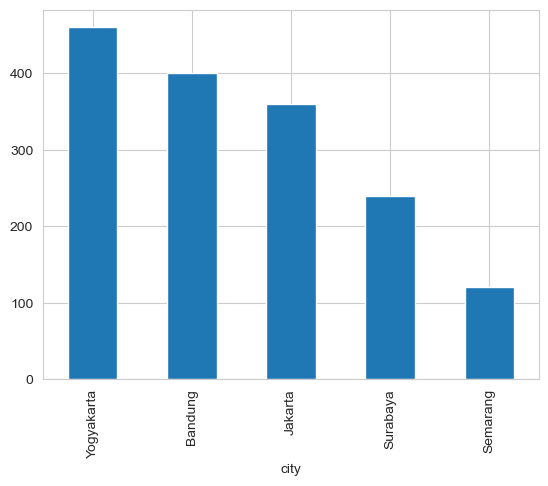

In [30]:
# 1. Which city is most visited? Yogyakarta
total_user_visit_city = df_tourism.groupby('city')['user_id'].count().sort_values(ascending=False)
total_user_visit_city.plot(kind='bar')

<Axes: xlabel='category'>

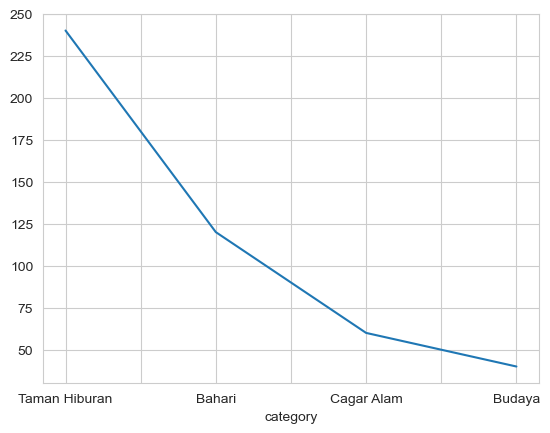

In [32]:
# 2. What categories are most visited in Yogyakarta? Taman Hiburan 
df_tourism_Yogyakarta = df_tourism[df_tourism['city']=='Yogyakarta']
category_tourism_popular_yogyakarta = df_tourism_Yogyakarta.groupby('category')['user_id'].count().sort_values(ascending=False)
category_tourism_popular_yogyakarta.plot(kind='line')

In [12]:
# 3. Why is the taman hiburan category in Yogyakarta the most visited, compared to other categories in Yogyakarta?
# Jika dilihat dari place name, jumlah place name di kategori taman hiburan paling banyak daripada kategori lainnya
# Namun jumlah pengunjungnya hampir mirip dengan kategori lain
# Sehingga karena hal inilah kategori taman hiburan memiliki pengunjung tertingi, dari semua kategori wisata yogyakarta
place_name_popular = df_tourism_Yogyakarta.groupby(["category", "place_name", "rating", "price","time_minutes"])["rating"].count()
place_name_popular

category       place_name                     rating  price  time_minutes
Bahari         Pantai Greweng                 4.6     5000   0.0             20
               Pantai Kesirat                 4.6     5000   90.0            60
               Pantai Parangtritis            4.5     10000  0.0             40
Budaya         Monumen Yogya Kembali          4.5     15000  30.0            20
               Museum Sonobudoyo Unit I       4.6     5000   120.0           20
Cagar Alam     Geoforest Watu Payung Turunan  4.5     0      60.0            20
               Goa Cerme                      4.4     3000   90.0            20
               Goa Pindul                     4.5     40000  0.0             20
Taman Hiburan  Alun Alun Selatan Yogyakarta   4.6     0      60.0            20
               Blue Lagoon Jogja              4.3     10000  0.0             20
               Desa Wisata Pulesari           4.4     0      0.0             20
               Desa Wisata Tembi              

### B. Top city with category tour, many traveler

In [13]:
# City with top category budaya
df_top_budaya = df_tourism[df_tourism['category']=='Budaya']
df_top_budaya = df_top_budaya.groupby('city')['user_id'].count().sort_values(ascending=False)

# City with top category cagar alam
df_top_cagar_alam = df_tourism[df_tourism['category']=='Cagar Alam']
df_top_cagar_alam = df_top_cagar_alam.groupby('city')['user_id'].count().sort_values(ascending=False)

# City with top category taman hiburan
df_top_taman_hiburan = df_tourism[df_tourism['category']=='Taman Hiburan']
df_top_taman_hiburan = df_top_taman_hiburan.groupby('city')['user_id'].count().sort_values(ascending=False)

# City with top category pusat perelanjaan
df_top_pusat_perbelanjaan = df_tourism[df_tourism['category']=='Pusat Perbelanjaan']
df_top_pusat_perbelanjaan = df_top_pusat_perbelanjaan.groupby('city')['user_id'].count().sort_values(ascending=False)

# City with top category tempat ibadah
df_top_tempat_ibadah = df_tourism[df_tourism['category']=='Tempat Ibadah']
df_top_tempat_ibadah = df_top_tempat_ibadah.groupby('city')['user_id'].count().sort_values(ascending=False)

# City with top category bahari
df_top_bahari = df_tourism[df_tourism['category']=='Bahari']
df_top_bahari = df_top_bahari.groupby('city')['user_id'].count().sort_values(ascending=False)

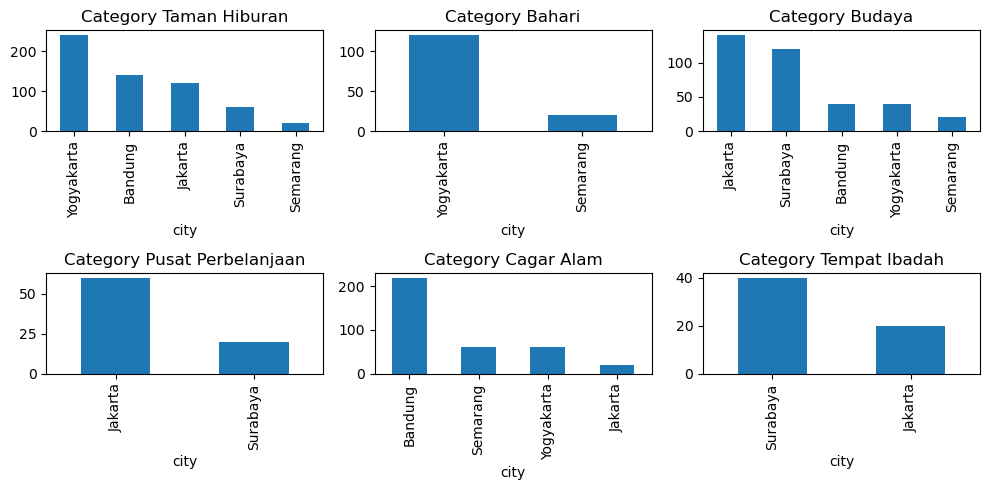

In [14]:
#Visualization city with top category budaya, cagar alam, taman hiburan, pusat perelanjaan, tempat ibadah, and bahari

fig,ax_subplot = plt.subplots(2,3,figsize=(10,5))

df_top_taman_hiburan.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[0,0])
df_top_bahari.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[0,1])
df_top_budaya.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[0,2])
df_top_pusat_perbelanjaan.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[1,0])
df_top_cagar_alam.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[1,1])
df_top_tempat_ibadah.plot(x='city',y='user_id',kind='bar',ax=ax_subplot[1,2])

#MAdd description
ax_subplot[0,0].set_title('Category Taman Hiburan')
ax_subplot[0,1].set_title('Category Bahari')
ax_subplot[0,2].set_title('Category Budaya')
ax_subplot[1,0].set_title('Category Pusat Perbelanjaan')
ax_subplot[1,1].set_title('Category Cagar Alam')
ax_subplot[1,2].set_title('Category Tempat Ibadah')

#Agar tidak saling menempel teksnya
plt.tight_layout()

### C. 5 most popular tourist attractions in each city

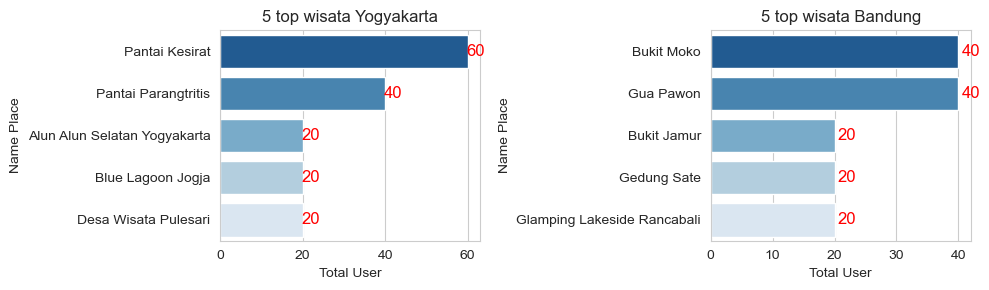

In [18]:
# 1. 5 top wisata in yogyakarta
df_top_yogyakarta = df_tourism[df_tourism['city']=='Yogyakarta']
df_top_5_yogyakarta = df_top_yogyakarta.groupby('place_name')['user_id'].count().nlargest(5).sort_values(ascending=False)

# 2. 5 top wisata in Bandung
df_top_Bandung = df_tourism[df_tourism['city']=='Bandung']
df_top_5_Bandung = df_top_Bandung.groupby('place_name')['user_id'].count().nlargest(5).sort_values(ascending=False)

#Visualization
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plot the bar chart for 5 top wisata yogyakarta
sns.barplot(x=df_top_5_yogyakarta, y=df_top_5_yogyakarta.index, ax=ax1, palette='Blues_r')
ax1.set(xlabel='Total User', ylabel='Name Place', title='5 top wisata Yogyakarta')

# Plot the bar chart for 5 top wisata Bandung
sns.barplot(x=df_top_5_Bandung, y=df_top_5_Bandung.index, ax=ax2, palette='Blues_r')
ax2.set(xlabel='Total User', ylabel='Name Place', title='5 top wisata Bandung')

# Add data labels to the bars
for ax in (ax1, ax2):
    for p in ax.patches:
        ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='center', va='center', fontsize=12, color='red')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

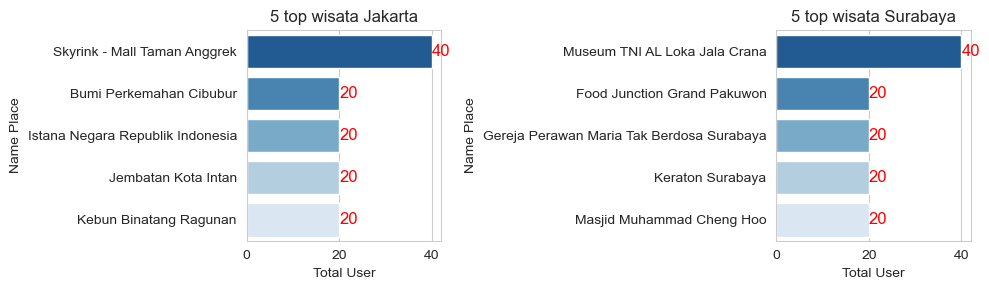

In [19]:
# 3. 5 top wisata in jakarta
df_top_Jakarta = df_tourism[df_tourism['city']=='Jakarta']
df_top_5_Jakarta = df_top_Jakarta.groupby('place_name')['user_id'].count().nlargest(5).sort_values(ascending=False)

# 4. 5 top wisata in  surabaya
df_top_Surabaya = df_tourism[df_tourism['city']=='Surabaya']
df_top_5_Surabaya = df_top_Surabaya.groupby('place_name')['user_id'].count().nlargest(5).sort_values(ascending=False)

sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plot the bar chart for5 top wisata in jakarta
sns.barplot(x=df_top_5_Jakarta, y=df_top_5_Jakarta.index, ax=ax1, palette='Blues_r')
ax1.set(xlabel='Total User', ylabel='Name Place', title='5 top wisata Jakarta')

# Plot the bar chart for  top wisata in  surabaya
sns.barplot(x=df_top_5_Surabaya, y=df_top_5_Surabaya.index, ax=ax2, palette='Blues_r')
ax2.set(xlabel='Total User', ylabel='Name Place', title='5 top wisata Surabaya')


# Add data labels to the bars
for ax in (ax1, ax2):
    for p in ax.patches:
        ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='center', va='center', fontsize=12, color='red')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

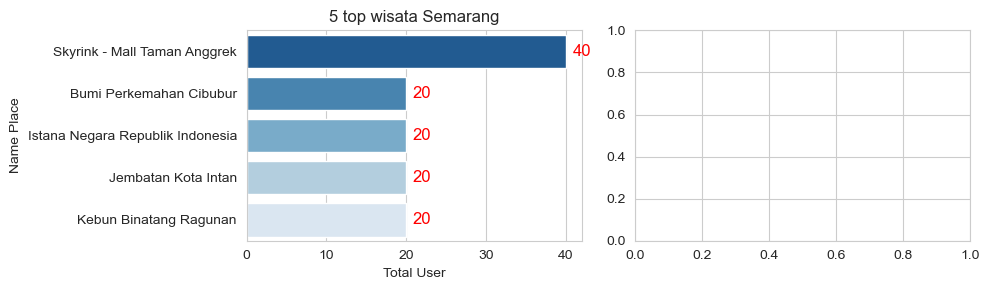

In [20]:
# 5. 5 top wisata in Semarang
df_top_Semarang = df_tourism[df_tourism['city']=='Semarang']
df_top_5_Semarang = df_top_Semarang.groupby('place_name')['user_id'].count().nlargest(5).sort_values(ascending=False)

sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# Plot the bar chart for 5 top wisata in Semarang
sns.barplot(x=df_top_5_Jakarta, y=df_top_5_Jakarta.index, ax=ax1, palette='Blues_r')
ax1.set(xlabel='Total User', ylabel='Name Place', title='5 top wisata Semarang')

# Add data labels to the bars
for ax in (ax1, ax2):
    for p in ax.patches:
        ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='center', va='center', fontsize=12, color='red')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

### D. Calculation price,rating, time minutes, and age per city

In [21]:
# 1. What is the average rating, price, time minutes, and age for each city?
df_rataan_5_kota = df_tourism.groupby(["city"])["rating","price","time_minutes","age"].mean().round(1)
df_rataan_5_kota

C:\Users\User\AppData\Local\Temp\ipykernel_5036\2621976464.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rataan_5_kota = df_tourism.groupby(["city"])["rating","price","time_minutes","age"].mean().round(1)


,rating,price,time_minutes,age
city,,,,
Bandung,4.4,25800.0,23.2,26.6
Jakarta,4.5,29333.3,54.2,31.1
Semarang,4.2,7666.7,55.0,30.8
Surabaya,4.4,4083.3,17.5,25.8
Yogyakarta,4.5,10913.0,45.7,28.8


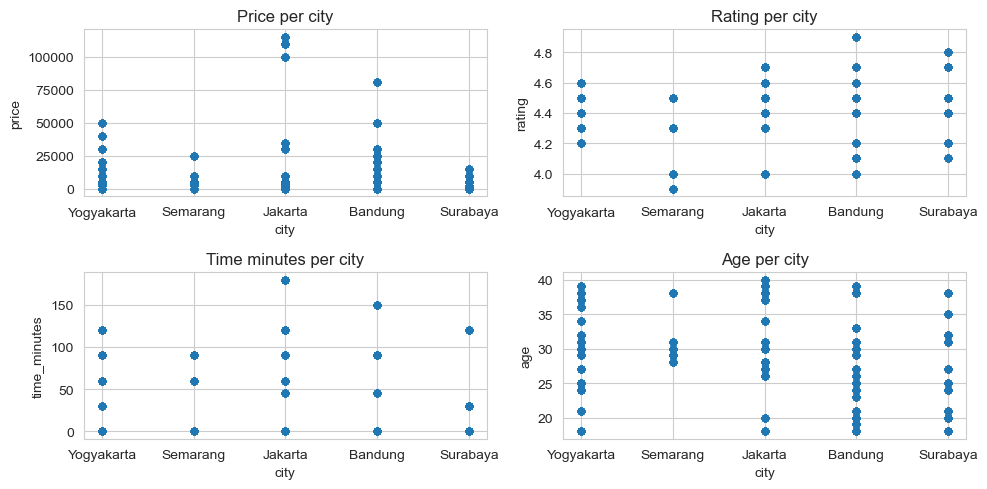

In [22]:
# 2. Range price, rating, time minutes, and age per city

fig,ax_subplot = plt.subplots(2,2,figsize=(10,5))

df_tourism.plot(x='city',y='price',kind='scatter',ax=ax_subplot[0,0])
df_tourism.plot(x='city',y='rating',kind='scatter',ax=ax_subplot[0,1])
df_tourism.plot(x='city',y='time_minutes',kind='scatter',ax=ax_subplot[1,0])
df_tourism.plot(x='city',y='age',kind='scatter',ax=ax_subplot[1,1])

#Menambah deskripsi
ax_subplot[0,0].set_title('Price per city')
ax_subplot[0,1].set_title('Rating per city')
ax_subplot[1,0].set_title('Time minutes per city')
ax_subplot[1,1].set_title('Age per city')
#Agar tidak saling menempel teksnya
plt.tight_layout()

### E. Grouping age all user

<Axes: >

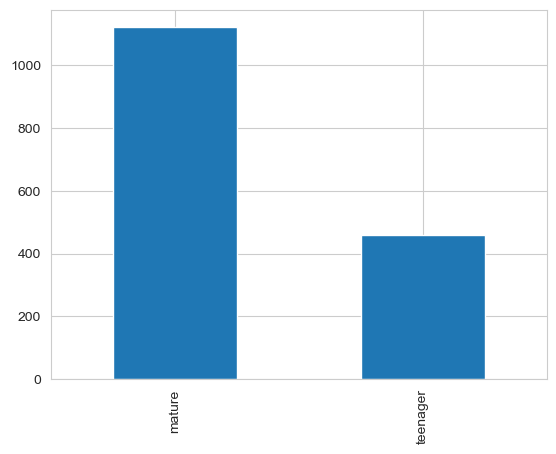

In [35]:
# mature : 12-25 tahun
# teenager : 26-45 tahun
df_tourism_age = df_tourism.assign(age_group=pd.cut(df_tourism['age'], bins=[12, 25, 45], right=False, labels=["teenager", "mature"]))
df_tourism_age = df_tourism_age['age_group'].value_counts()
df_tourism_age.plot(kind='bar')

### F. Grouping price each city

In [25]:
# 1. Price yogyakarta
df_price_yogyakarta = df_tourism[df_tourism['city']=='Yogyakarta']
df_price_yogyakarta = df_price_yogyakarta.assign(price_yogyakarta=pd.cut(df_price_yogyakarta['price'], bins=[0, 25000, 51000, np.Inf], right=False, labels=["cheap","normal","expensive",]))
df_price_yogyakarta = df_price_yogyakarta['price_yogyakarta'].value_counts()

# 2. Price semarang
df_price_semarang = df_tourism[df_tourism['city']=='Semarang']
df_price_semarang = df_price_semarang.assign(price_semarang=pd.cut(df_price_semarang['price'], bins=[0, 25000, 51000, np.Inf], right=False, labels=["cheap", "normal", "expensive",]))
df_price_semarang = df_price_semarang['price_semarang'].value_counts()

# 3. Price jakarta
df_price_jakartaa = df_tourism[df_tourism['city']=='Jakarta']
df_price_jakartaa = df_price_jakartaa.assign(price_jakarta=pd.cut(df_price_jakartaa['price'], bins=[0, 25000, 51000, np.Inf], right=False, labels=["cheap", "normal", "expensive",]))
df_price_jakartaa = df_price_jakartaa['price_jakarta'].value_counts()

# 4. Price surabaya
df_price_surabaya = df_tourism[df_tourism['city']=='Surabaya']
df_price_surabaya = df_price_surabaya.assign(price_surabaya=pd.cut(df_price_surabaya['price'], bins=[0, 25000, 51000, np.Inf], right=False, labels=["cheap", "normal", "expensive",]))
df_price_surabaya = df_price_surabaya['price_surabaya'].value_counts()

# 5. Price bandung
df_price_bandung = df_tourism[df_tourism['city']=='Bandung']
df_price_bandung = df_price_bandung.assign(price_bandung=pd.cut(df_price_bandung['price'], bins=[0, 25000, 51000, np.Inf], right=False, labels=["cheap", "normal", "expensive",]))
df_price_bandung = df_price_bandung['price_bandung'].value_counts()

df_price_5_city = pd.concat([df_price_yogyakarta,df_price_semarang,df_price_jakartaa,df_price_surabaya,df_price_bandung],axis=1)
df_price_5_city

,price_yogyakarta,price_semarang,price_jakarta,price_surabaya,price_bandung
cheap,400,100,240,240,200
normal,60,20,40,0,180
expensive,0,0,80,0,20


### G. Grouping time minutes each city

In [26]:
# 1. Time Minutes yogyakarta
df_time_minutes_yogyakarta = df_tourism[df_tourism['city']=='Yogyakarta']
df_time_minutes_yogyakarta = df_time_minutes_yogyakarta.assign(time_minutes_yogyakarta=pd.cut(df_time_minutes_yogyakarta['time_minutes'], bins=[0, 45, 90, np.Inf], right=False, labels=["near","normal","far",]))
df_time_minutes_yogyakarta = df_time_minutes_yogyakarta['time_minutes_yogyakarta'].value_counts()

# 2. Time Minutes semarang
df_time_minutes_semarang = df_tourism[df_tourism['city']=='Semarang']
df_time_minutes_semarang = df_time_minutes_semarang.assign(time_minutes_semarang=pd.cut(df_time_minutes_semarang['time_minutes'], bins=[0, 45, 90, np.Inf], right=False, labels=["near","normal","far",]))
df_time_minutes_semarang = df_time_minutes_semarang['time_minutes_semarang'].value_counts()

# 3. Time Minutes jakarta
df_time_minutes_jakarta = df_tourism[df_tourism['city']=='Jakarta']
df_time_minutes_jakarta = df_time_minutes_jakarta.assign(time_minutes_jakarta=pd.cut(df_time_minutes_jakarta['time_minutes'], bins=[0, 45, 90, np.Inf], right=False, labels=["near","normal","far",]))
df_time_minutes_jakarta = df_time_minutes_jakarta['time_minutes_jakarta'].value_counts()

# 4. Time Minutes surabaya
df_time_minutes_surabaya = df_tourism[df_tourism['city']=='Surabaya']
df_time_minutes_surabaya = df_time_minutes_surabaya.assign(time_minutes_surabaya=pd.cut(df_time_minutes_surabaya['time_minutes'], bins=[0, 45, 90, np.Inf], right=False, labels=["near","normal","far",]))
df_time_minutes_surabaya = df_time_minutes_surabaya['time_minutes_surabaya'].value_counts()

# 4. Time Minutes bandung
df_time_minutes_bandung = df_tourism[df_tourism['city']=='Bandung']
df_time_minutes_bandung = df_time_minutes_bandung.assign(time_minutes_bandung=pd.cut(df_time_minutes_bandung['time_minutes'], bins=[0, 45, 90, np.Inf], right=False, labels=["near","normal","far",]))
df_time_minutes_bandung = df_time_minutes_bandung['time_minutes_bandung'].value_counts()

df_time_minutes_5_city = pd.concat([df_time_minutes_yogyakarta,df_time_minutes_semarang,df_time_minutes_jakarta,df_time_minutes_surabaya,df_time_minutes_bandung],axis=1)
df_time_minutes_5_city

,time_minutes_yogyakarta,time_minutes_semarang,time_minutes_jakarta,time_minutes_surabaya,time_minutes_bandung
near,240,40,200,220,300
far,160,60,120,20,80
normal,60,20,40,0,20


### H. Users reviews

In [28]:
# 1. Average visitors city 
df_user_adress = df_tourism.groupby(["user_adress"])["user_id"].count().sort_values(ascending=False)

# 2. Average rating visitors city 
df_user_rating = df_tourism.groupby(["user_adress"])["rating"].mean().sort_values(ascending=False).round(1)

# 3. Average price visitors city
df_user_price = df_tourism.groupby(["user_adress"])["price"].mean().sort_values(ascending=False).round(0)

# 4. Average time minutes visitors city
df_user_time_minutes = df_tourism.groupby(["user_adress"])["time_minutes"].mean().sort_values(ascending=False)

df_users_review = pd.concat([df_user_adress,df_user_rating,df_user_price, df_user_time_minutes],axis=1)
df_users_review

,user_id,rating,price,time_minutes
user_adress,,,,
"Lampung, Sumatera Selatan",180,4.4,22778.0,23.333333
"Jakarta Utara, DKI Jakarta",160,4.3,15500.0,24.375000
"Bekasi, Jawa Barat",160,4.5,11250.0,22.500000
"Depok, Jawa Barat",140,4.4,28571.0,38.571429
"Yogyakarta, DIY",100,4.4,23800.0,78.000000
"Serang, Banten",100,4.3,46000.0,78.000000
"Semarang, Jawa Tengah",100,4.5,20200.0,30.000000
"Surabaya, Jawa Timur",80,4.4,3750.0,60.000000
"Sragen, Jawa Tengah",80,4.4,12000.0,0.000000
